In [92]:
from utils.initialization import *
from utils.arima_utils import *
from utils import pipe_def_arima
from utils.data_utils import *
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from tqdm import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
fognet = os.getcwd()
conf = build_conf(fognet)

In [56]:
data = load_raw_data()
df= build_dataset()

In [57]:
from utils.pipe_def_arima import Pipe
mpipe = Pipe()

In [58]:
root = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima'

# train-test-split rand yield 

In [118]:
train,test = train_test_split_rand_yield(model.dfgroup.get_group('group0'))

Le train is composed by 4078 observation
Le test is composed 4078 observation


In [121]:
len(train.feat_0)//48

84

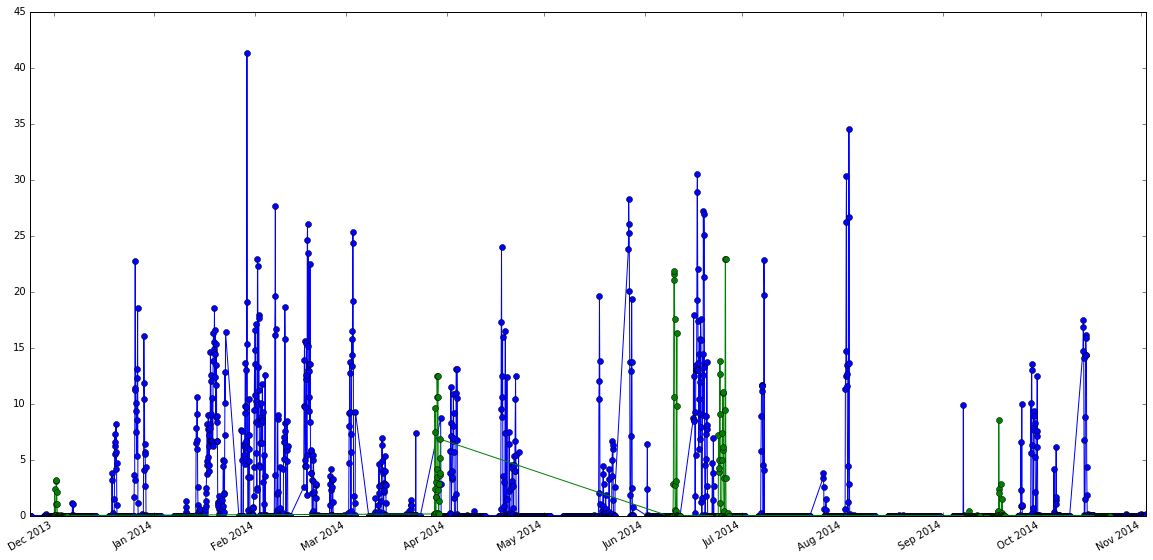

In [122]:
fig = plt.figure(figsize=(20,10))
train.feat_yield.dropna().plot(marker='o')
test.feat_yield.dropna().plot(marker='o')

# Base best model 

pipe_list = ['FeatureSelector','InterpolateMissingValueInputer','FillRemainingNaN','StandardScaler']
test_score : 2.23

pipe_list = ['FeatureSelector','EWMAMissingValueInputer','FillRemainingNaN','StandardScaler']
test_score : 2.19

pipe_list = ['FeatureSelector','EWMAMissingValueInputer','CreateLagArrays','FillRemainingNaN','StandardScaler']
lags = 6 measuremnts
test_score : 2.026

In [ ]:
############################
# pipe_maia improved
pipe_list = ['FeatureSelector',
             'InterpolateMissingValueInputer',
             'FillRemainingNaN',
             'StandardScaler']
pipe_kwargs = {'FeatureSelector__features': [f for f in data['micro_feats'].keys() if f not in ['wind_dir']]}
pipe_list = {'stage0': pipe_list}
pipe_kwargs = {'stage0': pipe_kwargs}
pipe_feat = mpipe(pipe_list,pipe_kwargs)
score=[]
for AR in range(0,5):
    for MA in range(0,5):
        try:
            model = ArimaModel(config,AR=AR,MA=MA,D=0,pipe=pipe_feat,
                          pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'),
                          pca_components = 0)
            model.train()
            score.append((AR,MA,model.test_rmse))
        except:
            pass

Loading the prepro pipeline
Order : 
(0, 0, 0)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 3058 observation
Le test is composed 1020 observation
train summary:
    rmse : 100000.000
    aic : 100000.000
    bic : 100000.000
    hqic : 100000.000
test summary:
    rmse : 2.000
    aic : 2.000
    bic : 2.000
    hqic : 2.000
Loading the prepro pipeline
Order : 
(0, 0, 1)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 3058 observation
Le test is composed 1020 observation


In [123]:
df = pd.DataFrame(np.array(score).astype(float),columns = ['AR','MA','rmse'])
df.sort_values(by='rmse')

,AR,MA,rmse
5,1,0,8.244477e-01
10,2,0,8.356776e-01
7,1,2,8.368597e-01
15,3,0,8.375357e-01
6,1,1,8.391649e-01
20,4,0,8.463415e-01
4,0,4,8.495687e-01
8,1,3,8.592452e-01
9,1,4,8.594482e-01
14,2,4,8.632279e-01


## Baseline : 0.814 

In [101]:
# BASE PIPE - score de 0.821 sur le test set !!!!!
############################
# pipe_maia improved
config = parse_conf_file(os.path.join(root,'model_2','conf_model.json'))
base_pipe_list = ['FeatureSelector',
             'InterpolateMissingValueInputer',
             'CreateLagArrays',
             'FillRemainingNaN',
             'StandardScaler']
features = [f for f in data['micro_feats'] if f not in ['wind_ms','wind_dir']]
base_pipe_kwargs = {'FeatureSelector__features': features,
                    'CreateLagArrays__lags':7}

In [102]:
pipe_list = {'base': base_pipe_list}
pipe_kwargs = {'base': base_pipe_kwargs}
pipe_feat = mpipe(pipe_list,pipe_kwargs)
score=[]
model = ArimaModel(config,AR=1,MA=0,D=0,pipe=pipe_feat,
                   pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'),
                   pca_components = 0)
model.train()


Loading the prepro pipeline
2
Order : 
(1, 0, 0)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1847 observation
Le test is composed 1847 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 4078 observation
Le test is composed 4078 observation
Le train is composed by 1452 observation
Le test is composed 1452 observation
Le train is composed by 1847 observation
Le test is composed 1847 observation
train summary:
    rmse : 1.763
    aic : 5927.511
    bic : 6218.472
    hqic : 6033.619
test summary:
    rmse : 2.074
    aic : 3318.797
    bic : 3609.758
    hqic : 3424.905
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_2/AR_1_MA_0_D_0/submissions_20160419_101734.csv


Overfit the training set ! En dessous de 0.82, an improvment in the score do not get me an improvement on the leaderboard!

## Improve l0 

In [ ]:
# BASE PIPE - score de 0.821 sur le test set !!!!!
l0_pipe_list = ['FeatureSelector',
             'EWMAMissingValueInputer',
             'FillRemainingNaN',
             'StandardScaler']
features = ['wind_ms']
l0_pipe_kwargs = {'FeatureSelector__features': features}

In [50]:
pipe_list = {'base': base_pipe_list,
            'l0':l0_pipe_list}
pipe_kwargs = {'base': base_pipe_kwargs,
               'l0':l0_pipe_kwargs}
pipe_feat = mpipe(pipe_list,pipe_kwargs)
score=[]
model = ArimaModel(config,AR=1,MA=0,D=0,pipe=pipe_feat,
                   pipe_yield = getattr(pipe_def_arima,'pipe_yield_base'),
                   pca_components = 0)
model.train()


Loading the prepro pipeline
2
Order : 
(1, 0, 0)
Season order : 
(0, 0, 0, 0)
Set up the checkpoints
Le train is composed by 3058 observation
Le test is composed 1020 observation
Le train is composed by 1089 observation
Le test is composed 363 observation


/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/statsmodels-0.8.0-py2.7-macosx-10.5-x86_64.egg/statsmodels/base/model.py:471: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Le train is composed by 1385 observation
Le test is composed 462 observation
Le train is composed by 3058 observation
Le test is composed 1020 observation
Le train is composed by 1089 observation
Le test is composed 363 observation
Le train is composed by 1385 observation
Le test is composed 462 observation
train summary:
    rmse : 1.715
    aic : 5972.543
    bic : 6086.307
    hqic : 6014.631
test summary:
    rmse : 0.822
    aic : 1649.338
    bic : 1740.041
    hqic : 1684.669
Will write output to /Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_2/AR_1_MA_0_D_0/submissions_20160418_183003.csv


## Test 

In [111]:
data['micro_feats']

{'gusts_ms': ' A measure of the highest gust during the reporting interval',
 'humidity': ' A measure of the humidity in the air',
 'leafwet450_min': ' Leaf wetness (a measure of the presence of dew) sensor 1',
 'leafwet460_min': ' Leaf wetness (a measure of the presence of dew) sensor 2',
 'leafwet_lwscnt': ' Leaf wetness (a measure of the presence of dew) sensor 3',
 'percip_mm': ' Perciptitation (mm)',
 'temp': ' The temperature',
 'wind_dir': ' The dominant direction the wind is blowing in',
 'wind_ms': ' A measure of the current wind speed'}

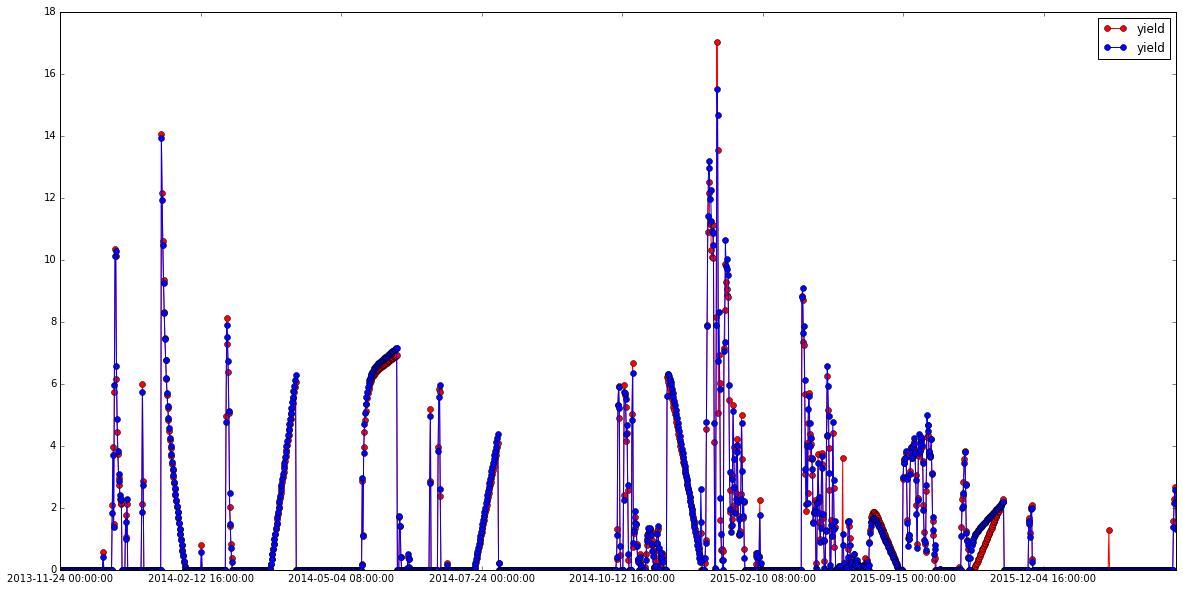

In [52]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
a = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_2/AR_1_MA_0_D_0/submissions_20160418_180830.csv'
a1 = '/Users/thorey/Documents/project/competition/fognet/models/bbking/arima/model_2/AR_1_MA_0_D_0/submissions_20160418_182843.csv'
pd.read_csv(a,index_col=0).plot(ax=ax,label='old',color='r',marker='o')
pd.read_csv(a1,index_col=0).plot(ax=ax,label='new',marker='o')
ax.legend()

In [43]:
train,text = train_test_split_rand_yield(model.dfgroup.get_group('group0'))

Le train is composed by 4078 observation
Le test is composed 4078 observation


Le train is composed by 1847 observation
Le test is composed 1847 observation


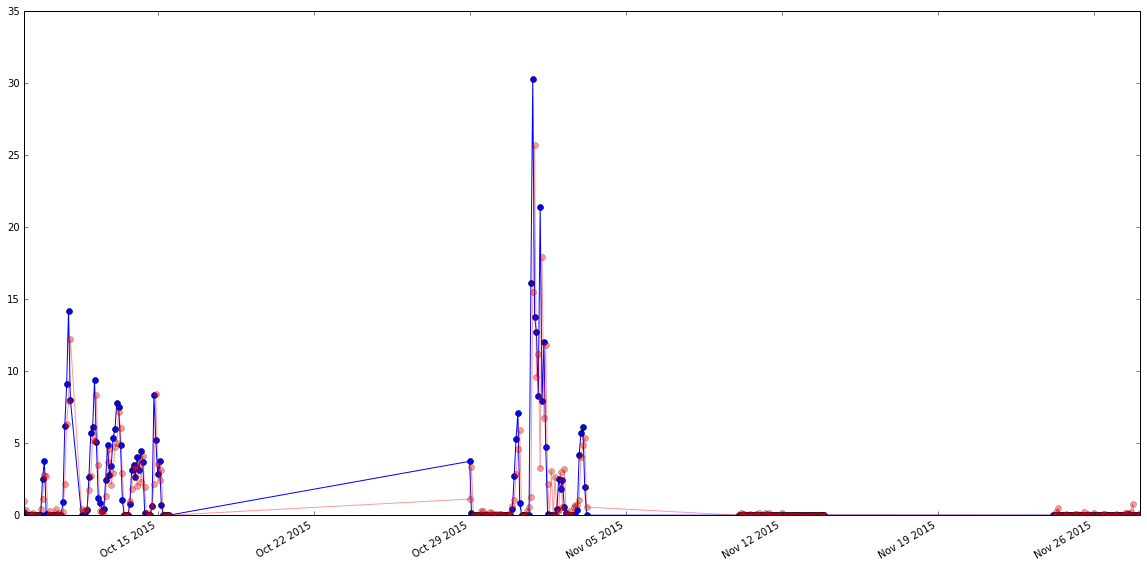

In [86]:
fig = plt.figure(figsize=(20,10))
train, test = train_test_split_rand_yield(model.dfgroup.get_group('group3'))
test.loc[test.feat_yield.dropna().index,'feat_yield'].plot(marker='o')
test.loc[test.feat_yield.dropna().index,'yield_pred'].plot(marker='o',color='r',alpha=0.4)

In [78]:
train, test = train_test_split_rand_yield(model.dfgroup.get_group('group1'))

Le train is composed by 1452 observation
Le test is composed 1452 observation


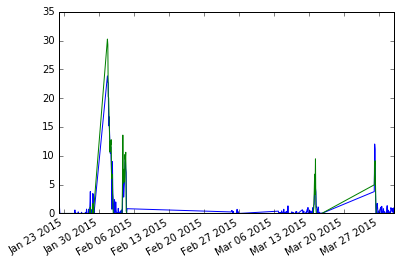

In [81]:
test.loc[test.feat_yield.dropna().index,'yield_pred'].plot()
test.loc[test.feat_yield.dropna().index,'feat_yield'].plot()

In [58]:
resid= test.feat_yield-test.yield_pred

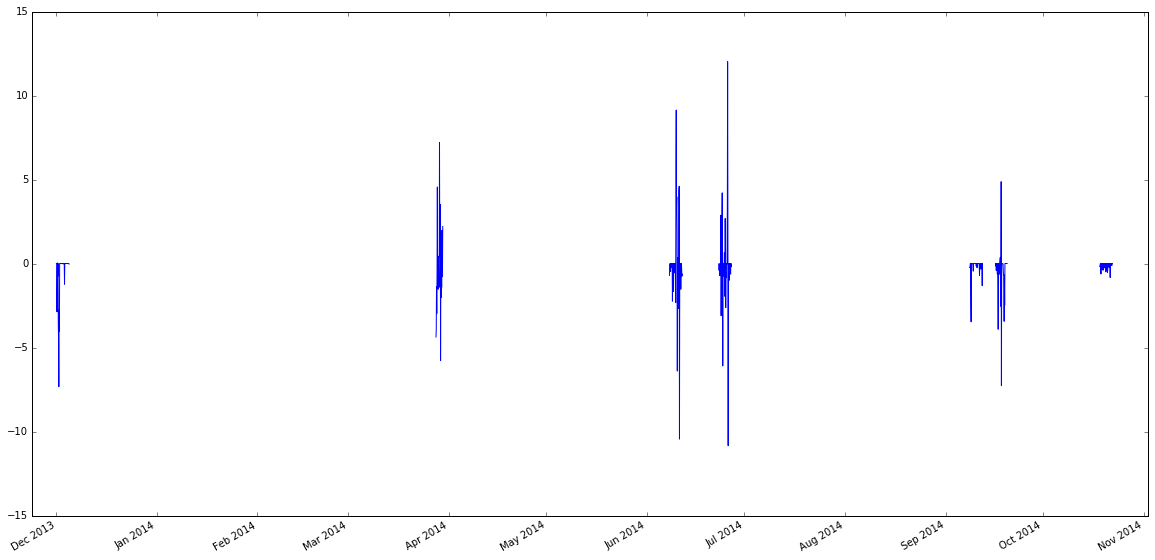

In [59]:
fig = plt.figure(figsize=(20,10))
resid.plot()